In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import datetime
from datetime import datetime
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
#crimes_2012 = pd.read_csv('Chicago_Crimes_2012_to_2017.csv', sep=',', error_bad_lines=False)
realestate_datacross =pd.read_csv('data_crosstab1.csv', sep=',', error_bad_lines=False)

Preprocessing

In [3]:
realestate_datacross.apply(lambda x: sum(x.isnull()))
realestate_datacross.apply(lambda x: len(x.unique()))

Region                        180
Month of Period                85
MedianSalePrice               754
Median Sale Price MoM        1199
Median Sale Price YoY        1856
Homes Sold                   1036
Homes Sold MoM                945
Homes Sold YoY               1326
New Listings                 1208
New Listings MoM             1123
New Listings YoY             1255
Inventory                    1230
Inventory MoM                 792
 Inventory YoY               1285
Days on Market                255
Days on Market MoM            278
Days on Market YoY            384
Average Sale To List          315
Average Sale To List MoM      271
Average Sale To List YoY      416
dtype: int64

In [4]:
#Month/year conversion
realestate_datacross.shape
realestate_datacross.dtypes

Region                        object
Month of Period               object
MedianSalePrice                int64
Median Sale Price MoM         object
Median Sale Price YoY         object
Homes Sold                     int64
Homes Sold MoM                object
Homes Sold YoY                object
New Listings                 float64
New Listings MoM              object
New Listings YoY              object
Inventory                      int64
Inventory MoM                 object
 Inventory YoY                object
Days on Market               float64
Days on Market MoM           float64
Days on Market YoY           float64
Average Sale To List          object
Average Sale To List MoM      object
Average Sale To List YoY      object
dtype: object

In [5]:
realestate_datacross['MonthOfYear'] = pd.to_datetime(realestate_datacross['Month of Period'])


In [6]:
realestate_datacross = realestate_datacross.set_index('MonthOfYear')

In [7]:
realestate_datacross['Year'] = realestate_datacross.index.year
realestate_datacross['Month'] = realestate_datacross.index.month

In [11]:
realestate_datacross.drop(['Month of Period'], axis=1)
realestate_datacross.head(5)

,Region,Month of Period,MedianSalePrice,Median Sale Price MoM,Median Sale Price YoY,Homes Sold,Homes Sold MoM,Homes Sold YoY,New Listings,New Listings MoM,...,Inventory MoM,Inventory YoY,Days on Market,Days on Market MoM,Days on Market YoY,Average Sale To List,Average Sale To List MoM,Average Sale To List YoY,Year,Month
MonthOfYear,,,,,,,,,,,,,,,,,,,,,
2012-02-01,"Chicago, IL",2012/02,130000,-7.10%,-3.70%,1499,-19.30%,5.30%,3598.0,23.10%,...,3.80%,-18.80%,119.0,10.0,17.0,95.10%,-0.20%,-0.20%,2012,2
2012-03-01,"Chicago, IL",2012/03,148000,13.50%,5.40%,1975,31.80%,-0.90%,4099.0,13.90%,...,2.30%,-19.30%,122.0,3.0,13.0,95.30%,0.30%,-0.90%,2012,3
2012-04-01,"Chicago, IL",2012/04,170000,15.10%,9.50%,1960,-0.80%,6.20%,3806.0,-7.10%,...,0.90%,-18.70%,112.0,-10.0,-6.0,95.30%,0.00%,-0.30%,2012,4
2012-05-01,"Chicago, IL",2012/05,178000,4.70%,13.90%,2392,22.00%,12.10%,3864.0,1.50%,...,-0.30%,-19.00%,92.0,-20.0,-12.0,95.80%,0.50%,-0.30%,2012,5
2012-06-01,"Chicago, IL",2012/06,200000,12.70%,6.90%,2696,12.70%,18.50%,3488.0,-9.70%,...,-2.90%,-19.80%,91.0,-1.0,-9.0,96.40%,0.70%,0.70%,2012,6


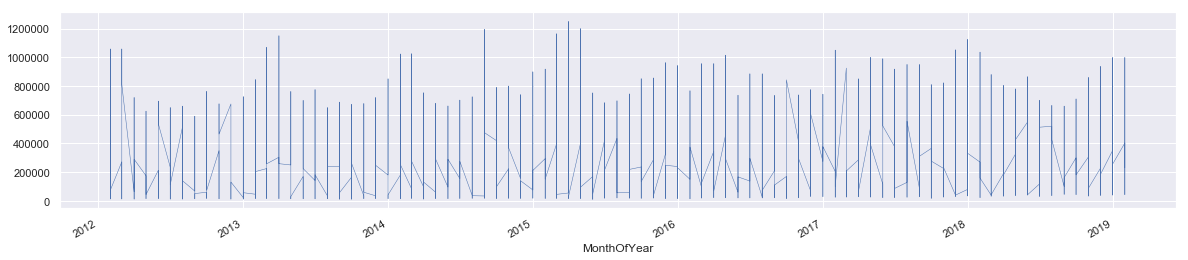

In [15]:
sns.set(rc={'figure.figsize':(20, 4)})
realestate_datacross['MedianSalePrice'].plot(linewidth=0.5)

Plotting Chicago Metro area house price variations

In [16]:
realestate_metroarea= realestate_datacross.loc[realestate_datacross['Region']=="Chicago, IL metro area"]

Text(0.5, 1.0, 'Chicago, IL metro area house price variations')

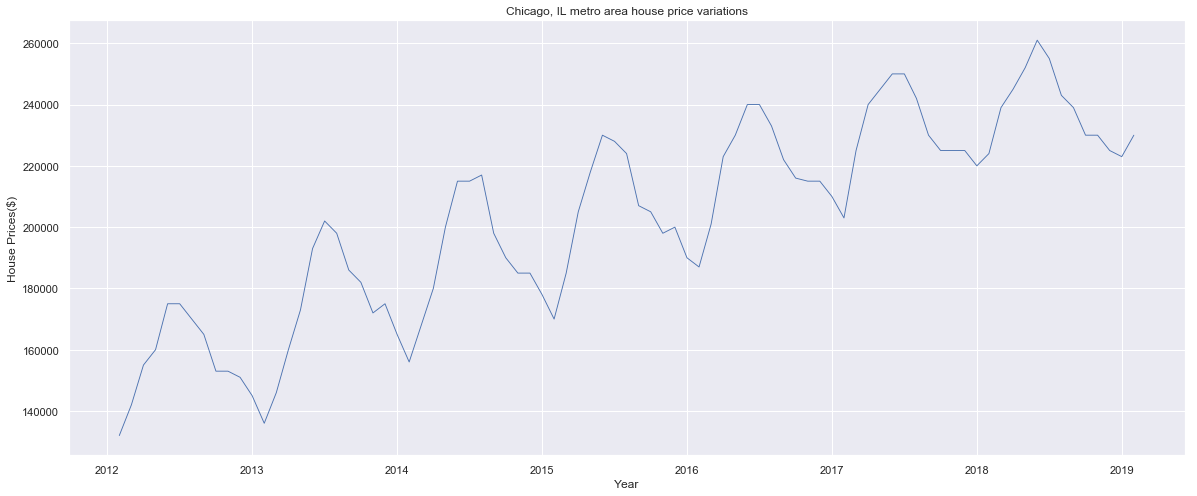

In [19]:
sns.set(rc={'figure.figsize':(20, 8)})
axes = realestate_metroarea['MedianSalePrice'].plot(linewidth=0.9)
axes.set_ylabel('House Prices($)')
axes.set_xlabel('Year')
axes.set_title('Chicago, IL metro area house price variations')

Plotting Chicago, IL - Albany Park area house price variations

In [21]:
realestate_albanypark= realestate_datacross.loc[realestate_datacross['Region']=="Albany Park"]

Text(0.5, 1.0, 'Albany Park house price variations')

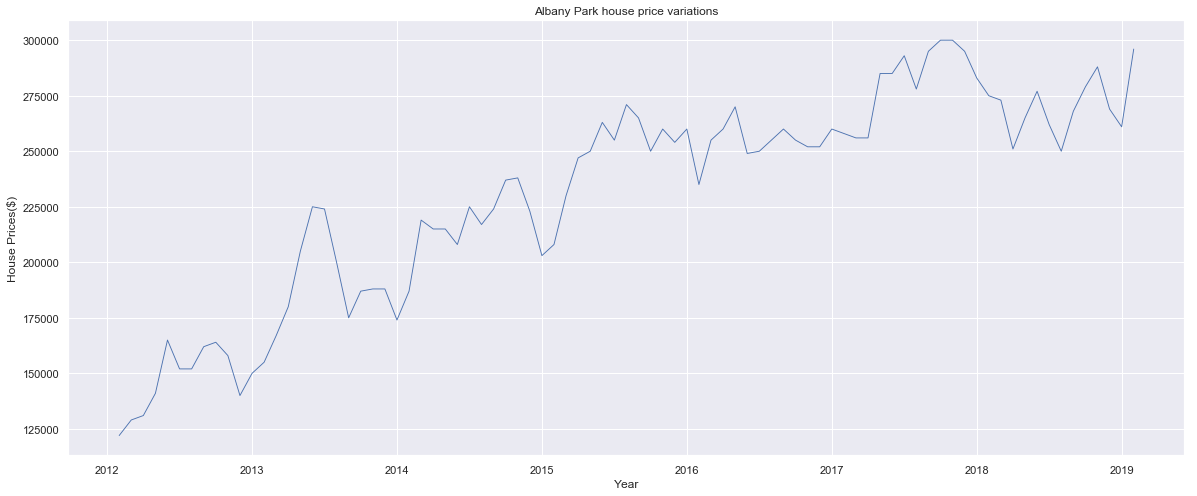

In [22]:
#sns.set(rc={'figure.figsize':(20, 4)})
axes = realestate_albanypark['MedianSalePrice'].plot(linewidth=0.9)
axes.set_ylabel('House Prices($)')
axes.set_xlabel('Year')
axes.set_title('Albany Park house price variations')

Plotting trends of house prices across Chicago area

In [23]:
realestate_chicago= realestate_datacross.loc[realestate_datacross['Region']=="Chicago, IL"]

Text(0.5, 1.0, 'Chicago house price variations')

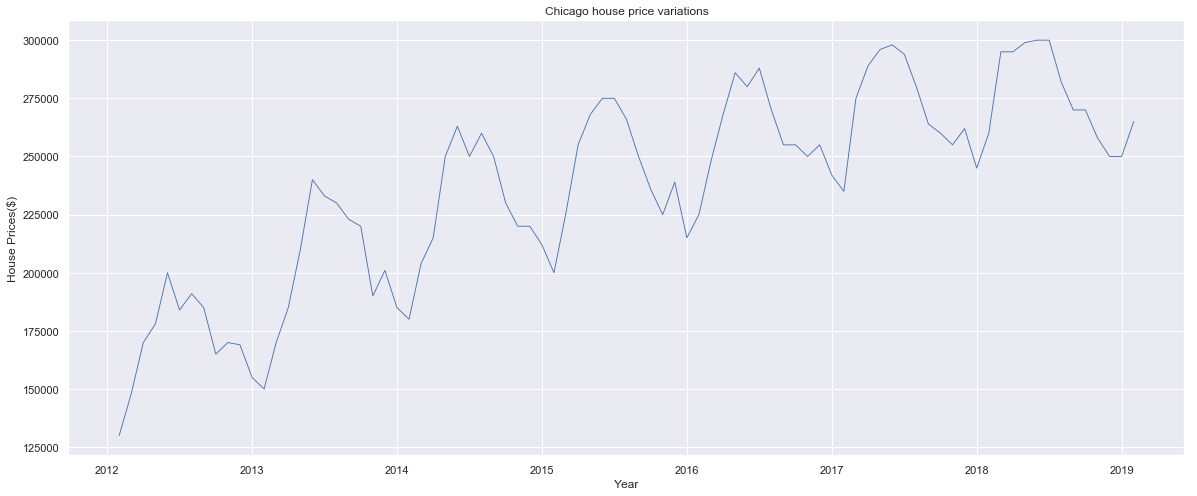

In [24]:
#sns.set(rc={'figure.figsize':(20, 4)})
axes = realestate_chicago['MedianSalePrice'].plot(linewidth=0.9)
axes.set_ylabel('House Prices($)')
axes.set_xlabel('Year')
axes.set_title('Chicago house price variations')

In [ ]:
Plotting number of houses sold for Chicago area

Text(0.5, 1.0, 'Number of home sold across Chicago')

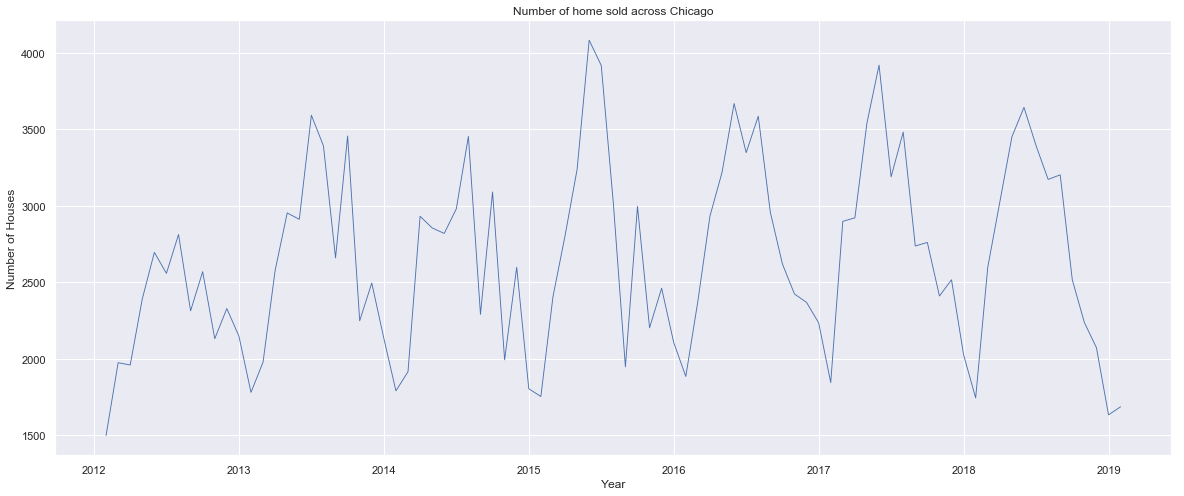

In [27]:
#sns.set(rc={'figure.figsize':(20, 4)})
axes = realestate_chicago['Homes Sold'].plot(linewidth=0.9)
axes.set_ylabel('Number of Houses')
axes.set_xlabel('Year')
axes.set_title('Number of home sold across Chicago')